# Sklearn NLP - TF-IDF - Remove Stop Words


- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [sklearn, tf_idf, sentiment, nlp, stopwords,classification, python]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/Amazon_Fine_Food_Reviews.csv')

In [3]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


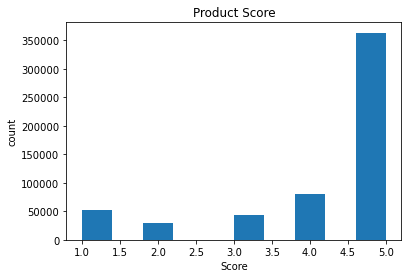

In [6]:
plt.hist(df.Score)
plt.title('Product Score')
plt.xlabel('Score')
plt.ylabel('count')
plt.show()

## Create sentiment feature

In [7]:
df.Score

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64

In [12]:
# Remove Score = 3
df = df[df.Score != 3]

# Positive = Score > 3, Negative = Score < 3
df['sentiment'] = df.Score.apply(lambda rating: +1 if rating > 3 else -1)

In [20]:
df[['sentiment', 'Score']].head()

,sentiment,Score
0,1,5
1,-1,1
2,1,4
3,-1,2
4,1,5


## Data Cleaning

In [21]:
def remove_punctuation(text):
    cleaned = "".join(char for char in text if char not in ('?', '.',',', 
                                                 ';','...', ':','-','!','"',"'"))
    return cleaned

In [23]:
df = df.dropna(subset=['Summary'])
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(lambda x: x.lower() )
df['Summary'] = df['Summary'].apply(remove_punctuation)
df['Summary'].head()

0    good quality dog food
1        not as advertised
2      delight says it all
3           cough medicine
4              great taffy
Name: Summary, dtype: object

## Define target and features

In [24]:
y = df['sentiment']

X = df['Summary']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((420631,), (105158,), (420631,), (105158,))

## Apply TF_IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(X_train)
X_test  = vectorize.transform(X_test)

In [37]:
X_train.shape

(420631, 35437)

## Create Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

model = RandomForestClassifier(n_estimators=20, verbose=2)

model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20


In [49]:
predictions = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.88      0.53      0.66     16233
           1       0.92      0.99      0.95     88925

    accuracy                           0.92    105158
   macro avg       0.90      0.76      0.81    105158
weighted avg       0.91      0.92      0.91    105158

[[ 8582  7651]
 [ 1164 87761]]
